[Data Set](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

- **RowNumber:** corresponds to the record (row) number and has no effect on the output.
- **CustomerId:** contains random values and has no effect on customer leaving the bank.
- **Surname:** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography:** a customer’s location can affect their decision to leave the bank.
- **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember:** active customers are less likely to leave the bank.
- **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited:** whether or not the customer left the bank.
- **Complain:** customer has complaint or not.
- **Satisfaction Score:** Score provided by the customer for their complaint resolution.
- **Card Type:** type of card hold by the customer.
- **Points Earned:** the points earned by the customer for using credit card.

In [60]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
df = pd.read_csv('data/Customer-Churn-Records.csv')
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [46]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             10000 non-null  object 
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
dtypes: fl

In [48]:
df.duplicated().sum()

0

In [49]:
df.isna().sum()

Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [50]:
df['Geography'].unique(), df['Gender'].unique(), df['Tenure'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0]))

In [51]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [57]:
def plotcat(items):
    for item in items:
        # Group the data by Geography and Exited
        grouped = df.groupby([item, 'Exited']).size().reset_index()
        grouped.columns = [item, 'Exited', 'Count']

        # Create a stacked bar plot with seaborn
        g = sns.catplot(
            data=grouped, kind="bar",
            x=item, y="Count", hue="Exited",
            errorbar=None, palette="muted", height=6, aspect=1.5
        )

        # Add title and labels to axes
        g.fig.suptitle(f'Number of People Who Exited or Not by {item}', y=1.03)
        g.set_axis_labels(item, "Count of People")
        g._legend.set_title('Exited')

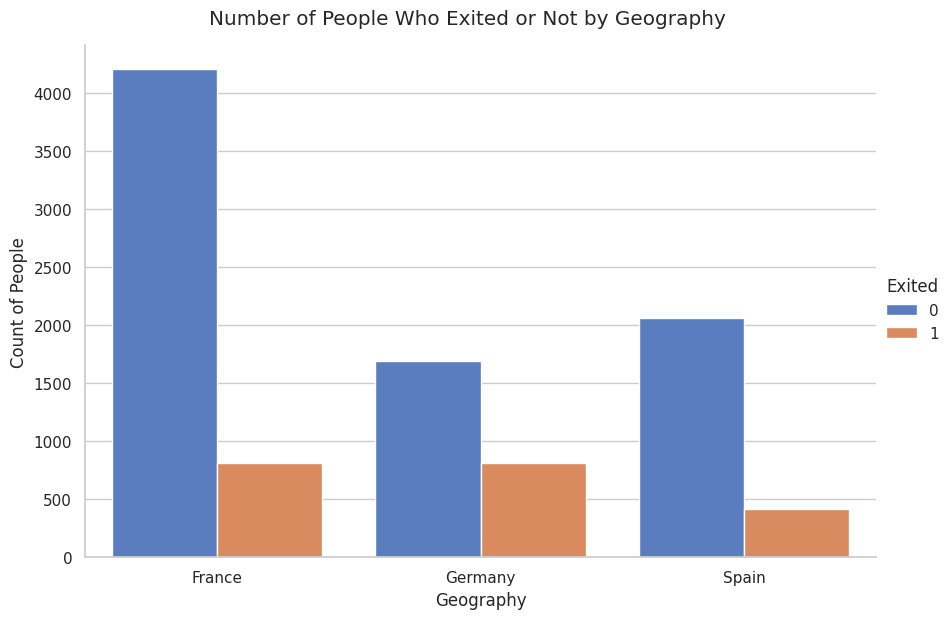

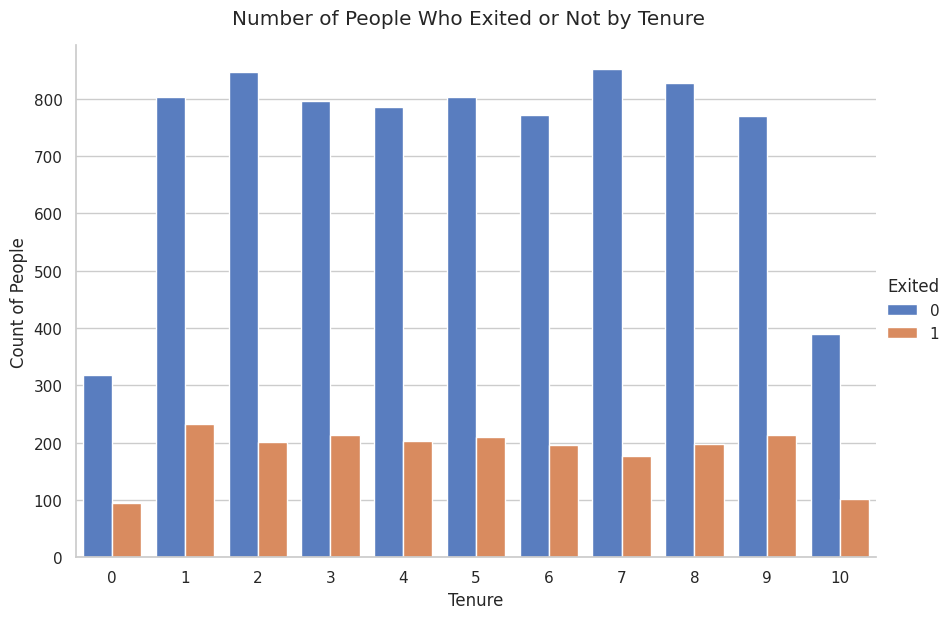

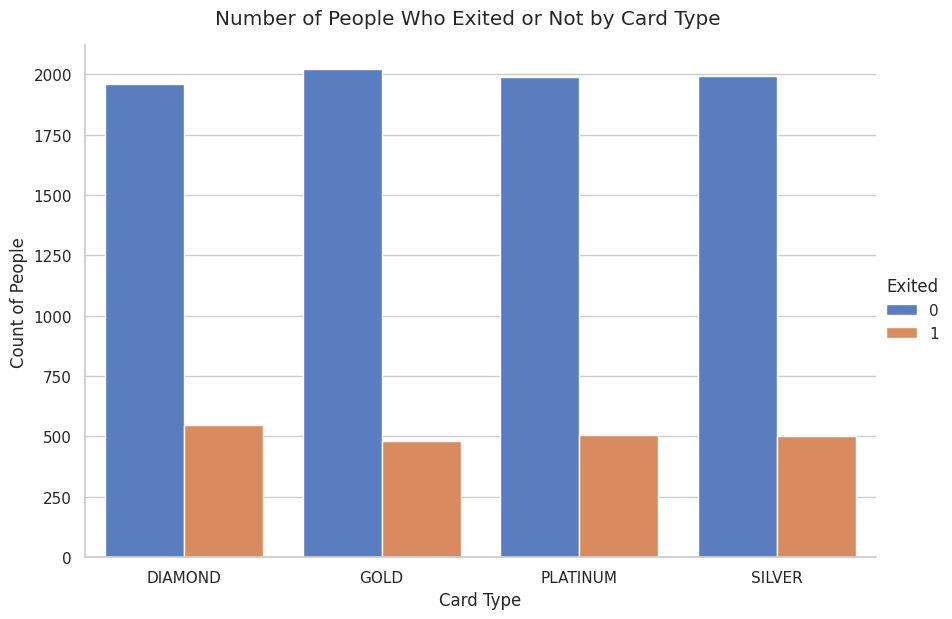

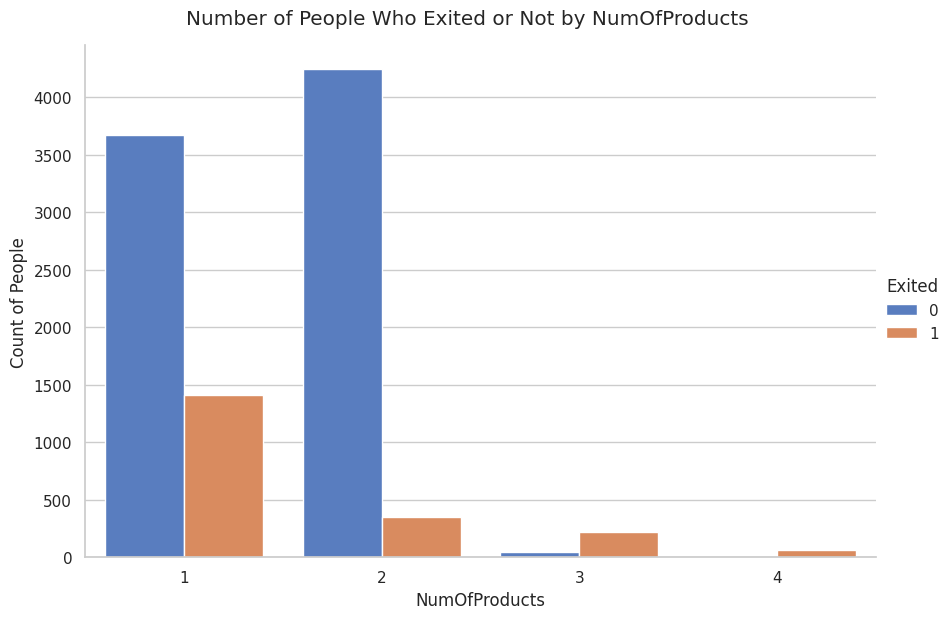

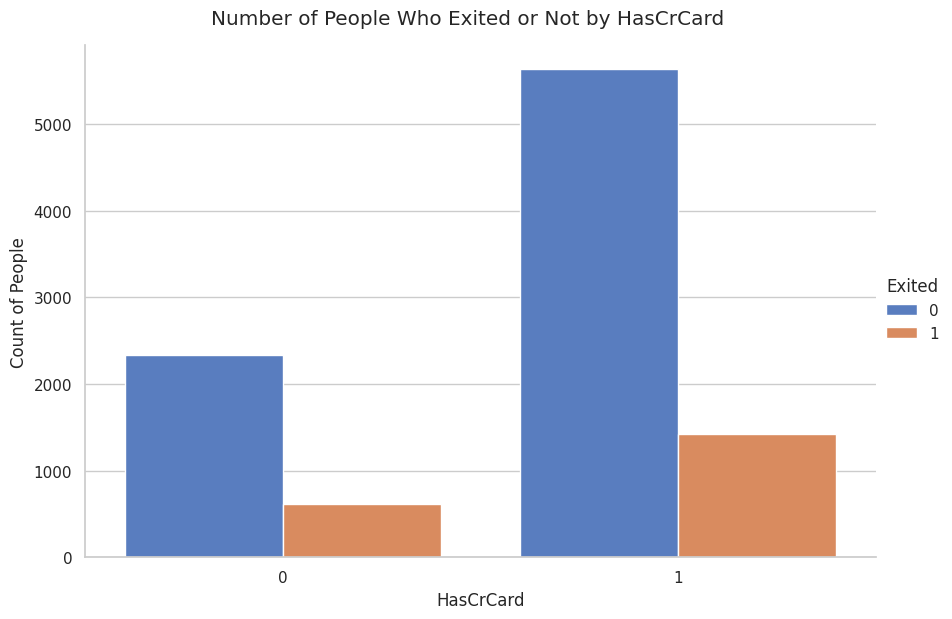

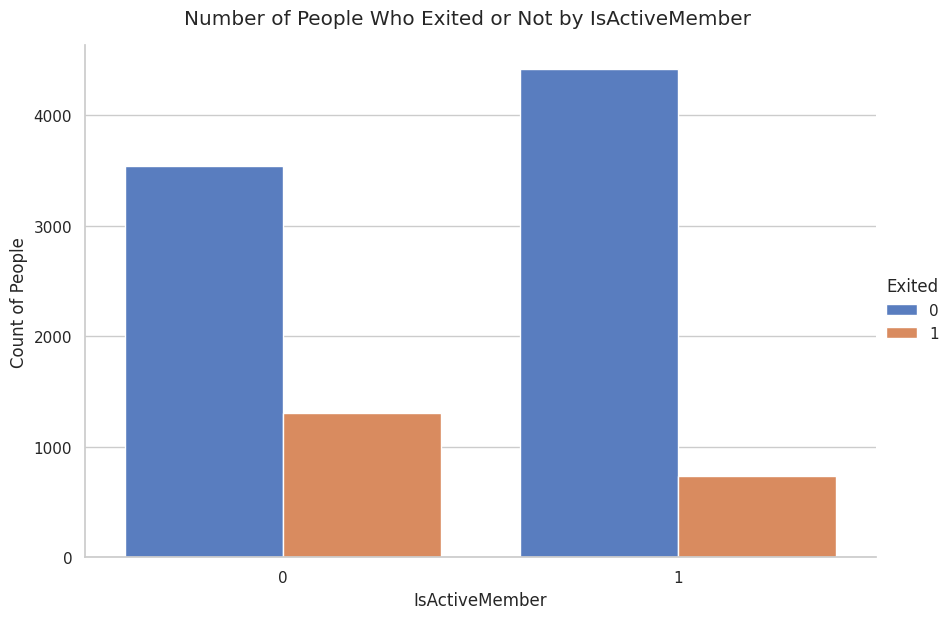

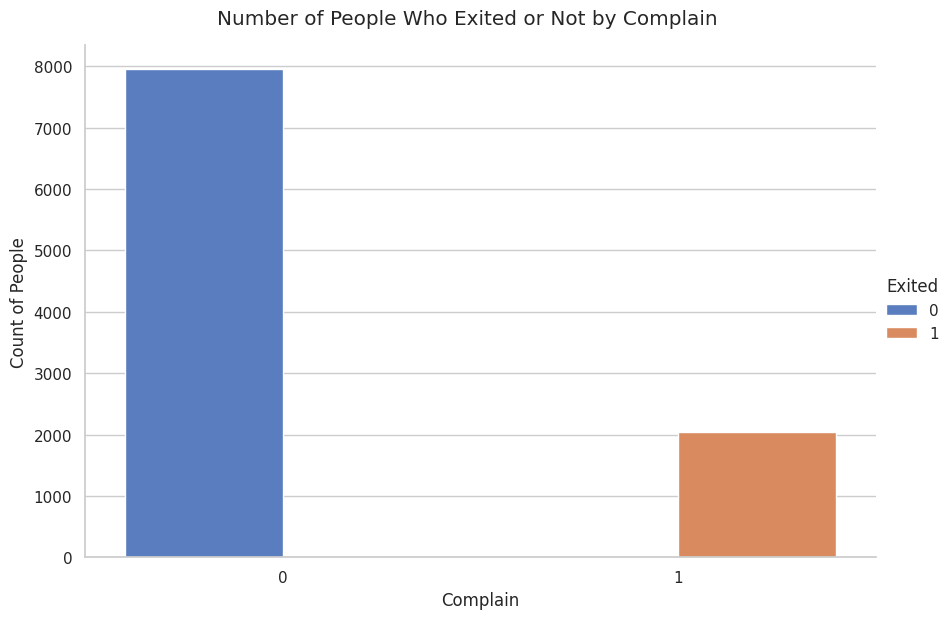

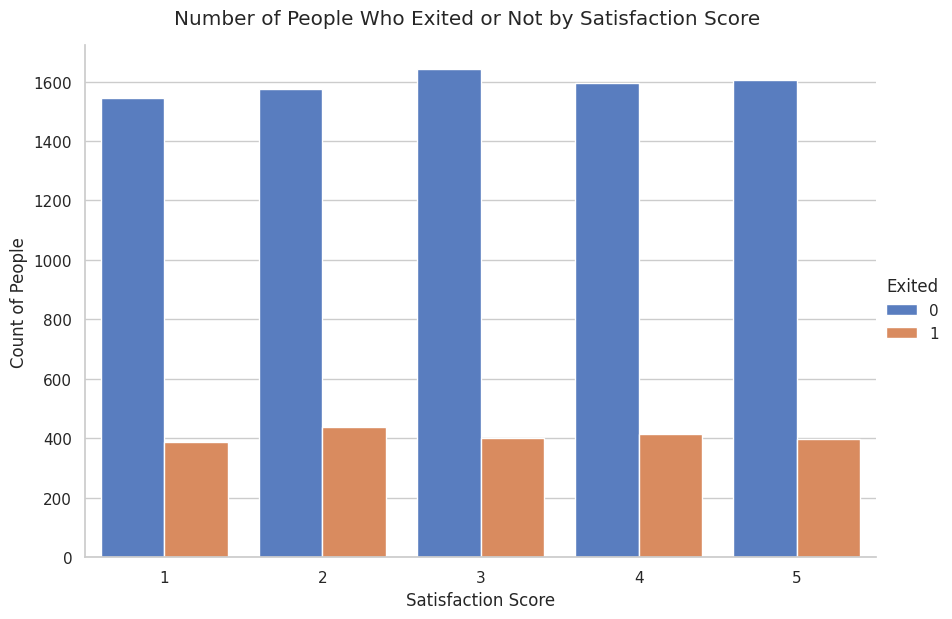

In [58]:
plotcat(['Geography', 'Tenure', 'Card Type', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score'])

In [69]:
def plot_histplot(items):
    for item in items:
        plt.figure(figsize=(15, 6))
        
        # Plot histogram
        sns.histplot(data=df, x=item, hue='Exited', palette='muted', kde=True)
        
        # Add title and labels to axes
        plt.title(f'Histogram of {item} by Exited')
        plt.xlabel(item)
        plt.ylabel('Frequency')
        
        # Manually check for and create a legend if needed
        handles, labels = plt.gca().get_legend_handles_labels()
        if handles:
            plt.legend(handles, labels, title='Exited', loc='best')

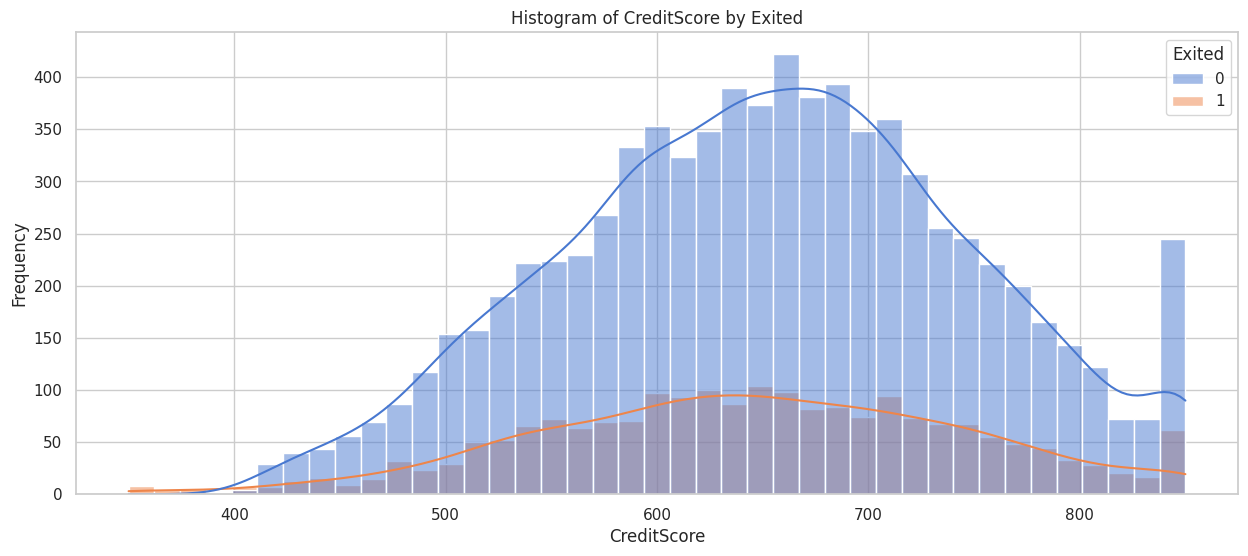

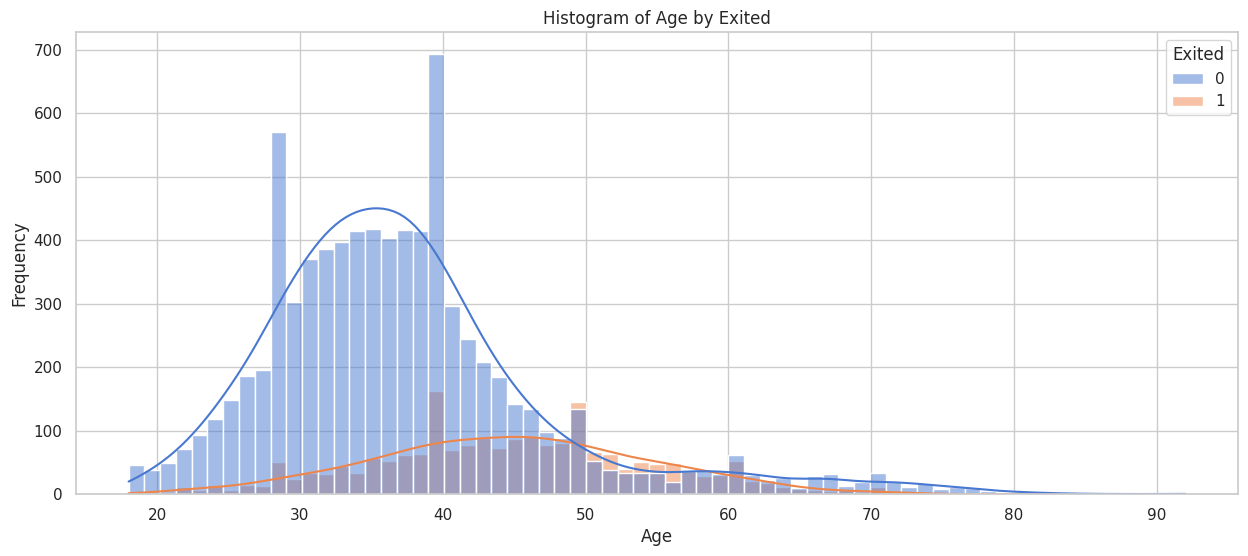

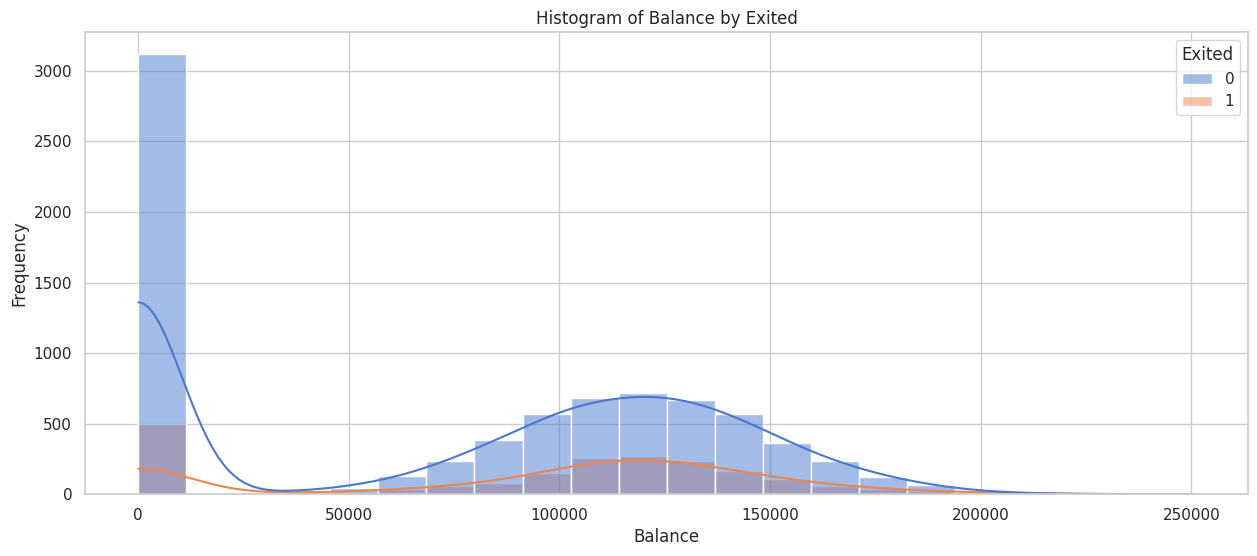

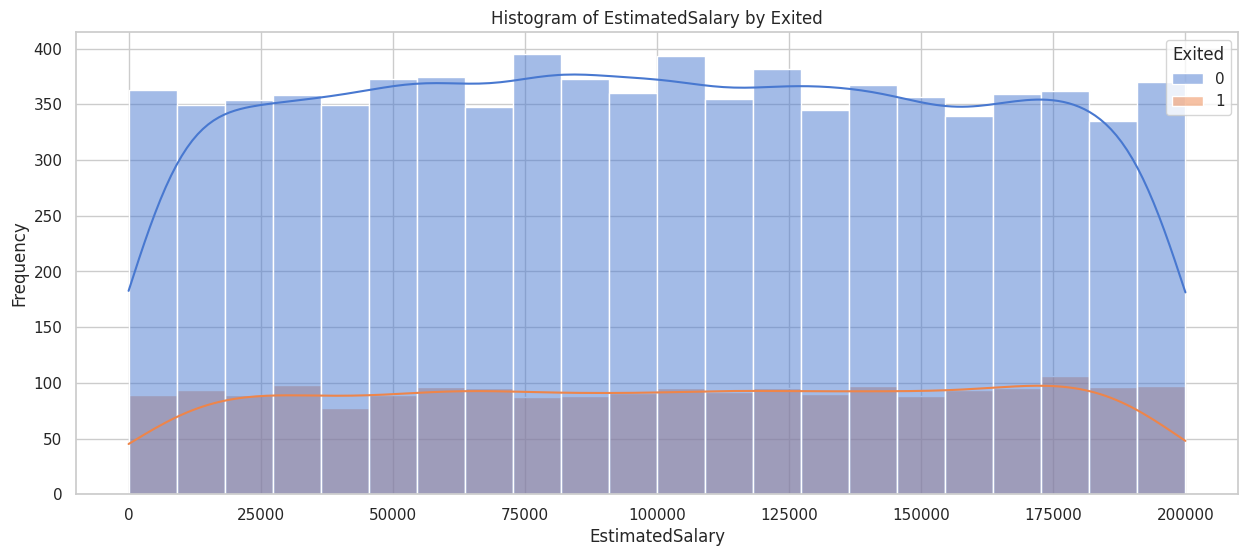

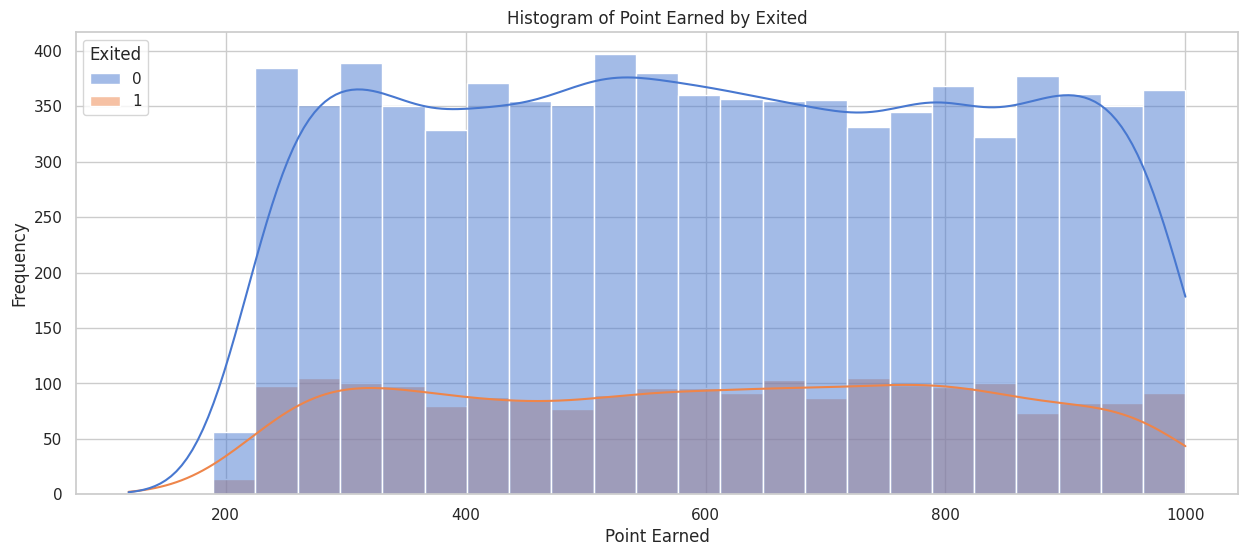

In [70]:
plot_histplot(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned'])

In [84]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Geography', 'Gender', 'Card Type']),
        ('num', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                                   'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 
                                   'Point Earned'])
    ]
)

# Fit and transform the data
transformed_data = column_transformer.fit_transform(df)

# Convert the transformed data to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=column_transformer.get_feature_names_out())

In [85]:
transformed_df

,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Male,cat__Card Type_GOLD,cat__Card Type_PLATINUM,cat__Card Type_SILVER,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,num__Complain,num__Satisfaction Score,num__Point Earned
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.972908,-0.721130,-0.630839
1,0.0,1.0,0.0,0.0,0.0,0.0,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.972908,-0.009816,-0.666251
2,0.0,0.0,0.0,0.0,0.0,0.0,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.972908,-0.009816,-1.015942
3,0.0,0.0,0.0,1.0,0.0,0.0,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.506866,1.412812,-1.135457
4,0.0,1.0,0.0,1.0,0.0,0.0,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.506866,1.412812,-0.803472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.506866,-1.432445,-1.356781
9996,0.0,0.0,1.0,0.0,1.0,0.0,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.506866,1.412812,0.728088
9997,0.0,0.0,0.0,0.0,0.0,1.0,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.972908,-0.009816,-0.188192
9998,1.0,0.0,1.0,1.0,0.0,0.0,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.972908,-0.721130,-1.184148
